In [25]:
import numpy as np
from skopt import gp_minimize
import os
from numpy import load, savez
import copy
import matplotlib.pyplot as plt
import nibabel as nib

from skimage.util import random_noise
from itertools import repeat
import multiprocessing
from multiprocessing import Pool

import loaddatasets
import noises

In [15]:
pip install h5py

     |████████████████████████████████| 4.5 MB 19 kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [39]:
import sys        
 
# appending the directory of mod.py
# in the sys.path list
sys.path.append('/home/ashwani/Desktop/Denoising-BrainTumor')       
 

In [40]:
### reload specific modules
import importlib
importlib.reload(noises)

<module 'noises' from '/home/ashwani/Desktop/Denoising-BrainTumor/noises.py'>

range(42, 104)
(50, 240, 240, 1)


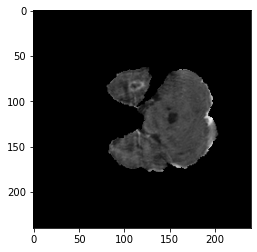

In [21]:
test_file1 = nib.load("../test_files/image_3d/testimg_3d_seg.nii").get_fdata(dtype=np.float32)
t1ce = nib.load("../test_files/image_3d/testimg_3d_t1ce.nii").get_fdata(dtype=np.float32)
res  = loaddatasets.findminmaxidx(test_file1, 900)
print(res)
input_dataset = np.rollaxis(t1ce, 2,0).reshape(155,240, 240, 1)[res][0:50]
print(input_dataset.shape)
input_dataset = (input_dataset - np.min(input_dataset))/(np.max(input_dataset) - np.min(input_dataset))
np.save("input_dataset_50.npy", input_dataset)
plt.imshow(input_dataset[0], cmap="gray")

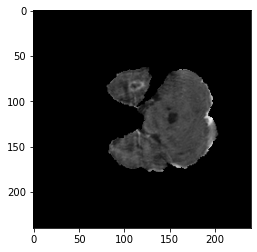

In [23]:
input_dataset = load("input_dataset_50.npy")
input_dataset.shape
plt.imshow(input_dataset[0], cmap="gray")

In [36]:
import tqdm

In [43]:
?data

Object `data` not found.


In [41]:
gauss_dataset1 =  noises.gaussian_wholedataset(input_dataset, 0, 0.05)

TypeError: 'module' object is not callable

In [42]:
def objective(x):
    return abs(5*x[0] - 2*x[1]- 21)


search_space= [(-5.,5.),(1.,12.)]


In [5]:
res1 = gp_minimize(objective, dimensions=search_space, n_calls=50);

In [6]:
print("Result Type : {}".format(type(res1)))
print("5*x- 2y- 21 at x={}, y={} is {}".format(res1.x[0], res1.x[1], res1.fun))
print("Result 1 Space : {}".format(res1.space))


Result Type : <class 'scipy.optimize.optimize.OptimizeResult'>
5*x- 2y- 21 at x=5.0, y=2.0139148475739095 is 0.027829695147818967
Result 1 Space : Space([Real(low=-5.0, high=5.0, prior='uniform', transform='normalize'),
       Real(low=1.0, high=12.0, prior='uniform', transform='normalize')])
